# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from astropy.visualization import hist

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Download the dataset from [here](https://drive.google.com/file/d/1jkkOcWm9aEF8gb0r2SsarF5Qdoaaw1do/view?usp=sharing) and place it in the data folder

In [2]:
# Read the data
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
data.select_dtypes

<bound method DataFrame.select_dtypes of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name  Gender        Age  \
0                               Braund, Mr. Owen Harris    male  22.000000   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                                Heikkinen, Miss. Laina  female  26.000000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                              Allen, Mr. William Henry    male  35.000000   
...                   

In [5]:
# Numerical variables
#PassengerId      int64
#Survived       float64
#Pclass           int64
#Age            float64
#SibSp            int64
#Parch            int64
#Fare           float64

In [6]:
# Categorical variables
#Name            object
#Gender          object
#Ticket          object
#Cabin           object
#Embarked        object

#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [7]:
# Plot style change
plt.style.use('classic')
# Figure size change
fig=plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of the column Age.

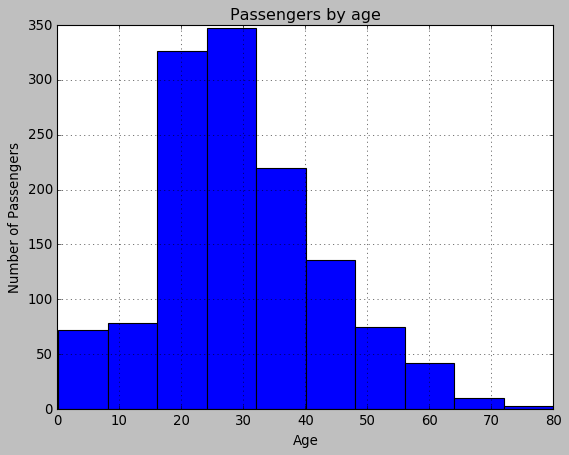

In [8]:
# Pandas plots are based on matplotlib
# Plot the histogram of column Age
# Set titles, labels, etc
# Show the plot
data.hist(column='Age')
plt.title("Passengers by age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

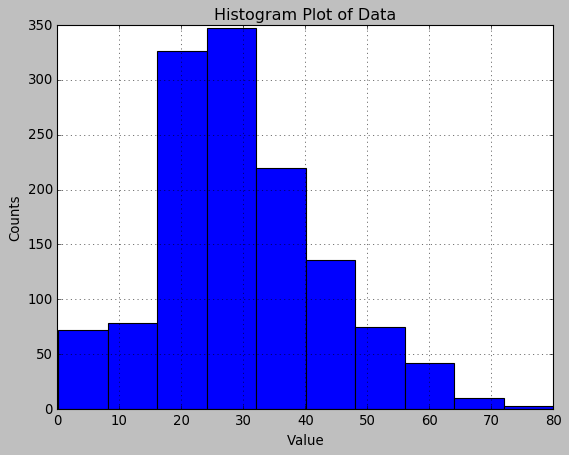

In [9]:
# Variables
# Create a figure of a fixed size and axes
# Plot the histogram using a different number of bins

data.hist(column='Age', bins=10)
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Histogram Plot of Data')
plt.grid(True)
plt.show()

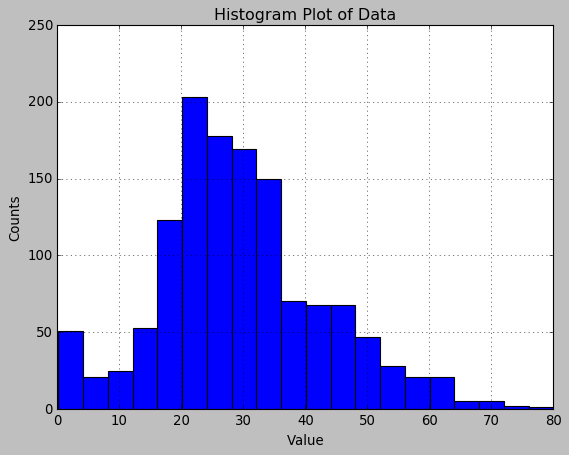

In [10]:
data.hist(column='Age', bins=20)
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Histogram Plot of Data')
plt.grid(True)
plt.show()

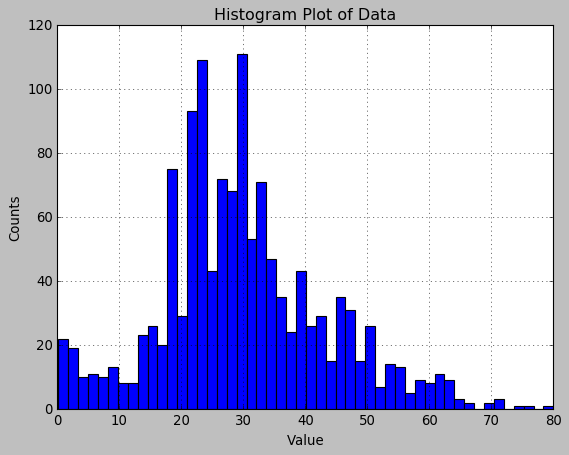

In [11]:
data.hist(column='Age', bins=50)
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Histogram Plot of Data')
plt.grid(True)
plt.show()

#### How does the bin size affect your plot? Comment.

~~~~
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
~~~~

#### Use seaborn to show the distribution of the column Age.

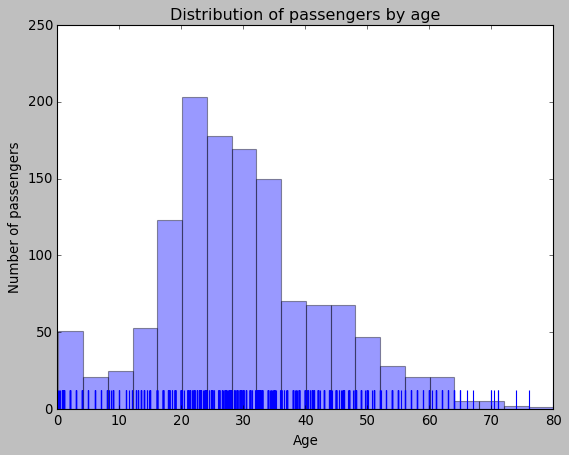

In [12]:
# Seaborn is a Python library based on matplotlib
# Plot of the age histogram using seaborn
# Show the plot
x=data["Age"]
fig=sns.distplot(x, bins=20, kde=False, rug=True);
fig.set(xlabel='Age', ylabel='Number of passengers')
plt.title("Distribution of passengers by age")
plt.show()

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

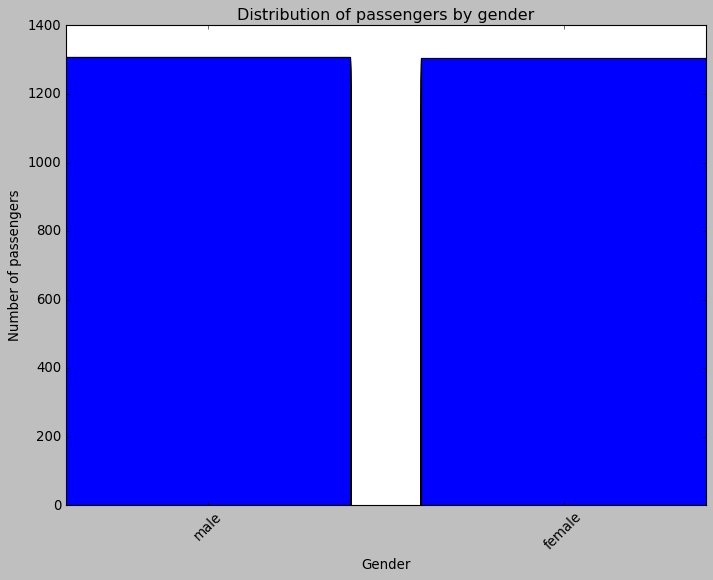

In [13]:
# OPTION 1 - Matplotlib
# Bar plot of the gender
# Add labels to the plot and change xticks rotation
# Show the plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(data["Gender"],data['PassengerId'])
ax.set_xlabel('Gender')
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of passengers by gender")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of passengers by gender')

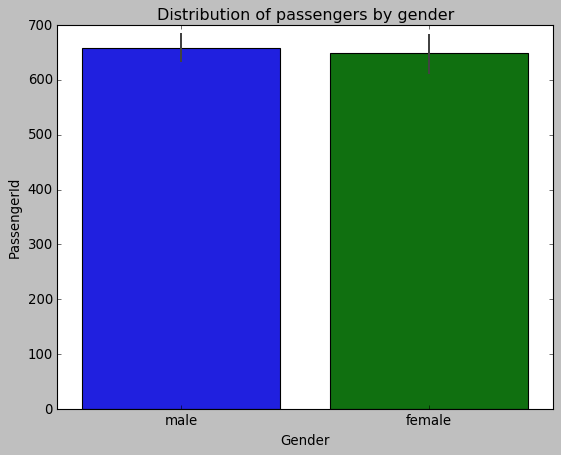

In [14]:
# OPTION 2 - Seaborn
# Seaborn Countplot
# Show the plot
sns.barplot(x="Gender", y='PassengerId', data=data).set_title("Distribution of passengers by gender")

#### Use the right plot to visualize the column Pclass.

Text(0.5, 1.0, 'Distribution of passengers by class')

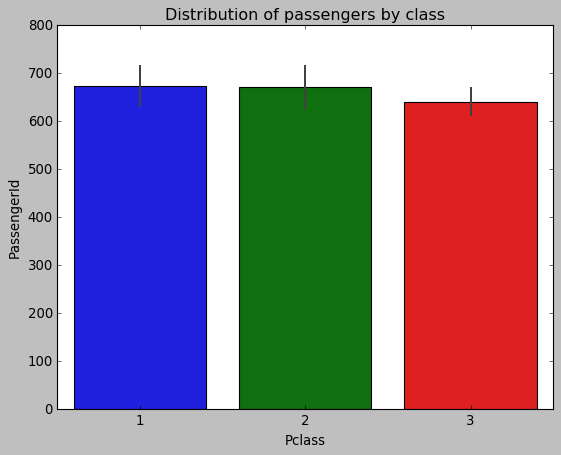

In [15]:
# Bar plot of Pclass
# Add labels to the plot and change xticks rotation
# Show the plot
sns.barplot(x="Pclass", y='PassengerId', data=data).set_title("Distribution of passengers by class")

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

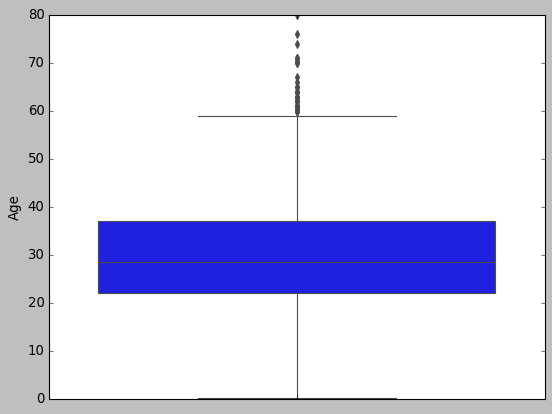

In [16]:
# Box plot
# Show the plot
sns.boxplot(y=data['Age'])
plt.show()

In [17]:
#This boxplot shows us that the majority of the passengers were aged between 20 and 40 years old
#first quartile shows ages between 0 and 20, third quartile shows ages between 40 and 60

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

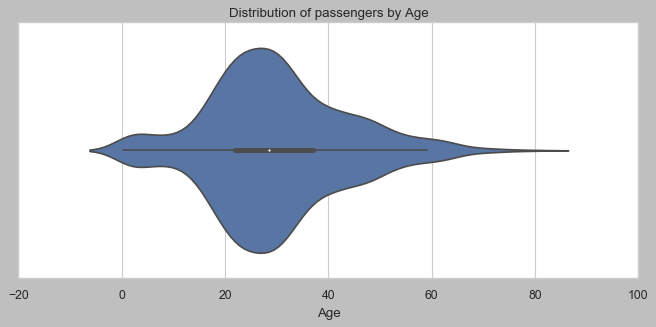

In [18]:
# Set figure size
# Violin plot
# Show the plot
plt.figure(figsize=(10,4))
sns.set(style='whitegrid')
sns.violinplot(x=data["Age"]).set_title("Distribution of passengers by Age")
plt.show()

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

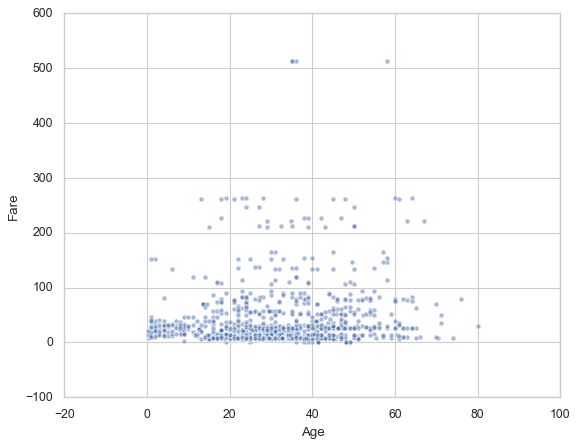

In [19]:
# OPTION 1
# Scatter plot
# Add labels
# Show the plot
age=data.Age
fare=data.Fare
plt.scatter(age,fare, alpha=0.5,cmap='viridis')
plt.xlabel("Age")
plt.ylabel('Fare')
plt.show()


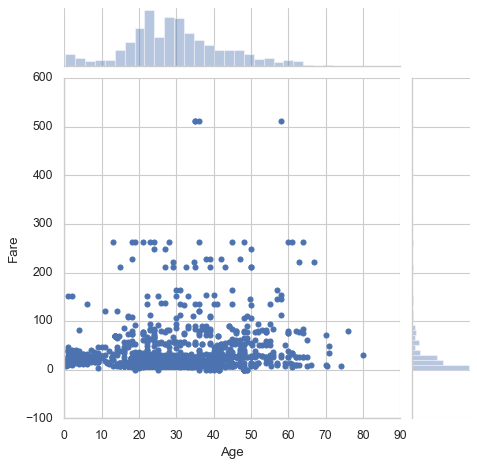

In [20]:
# OPTION 2
# Joinplot
# Show the plot
sns.jointplot(x="Age", y="Fare", data=data)

#### Using Seaborn plot the correlation matrix.

C:\Users\Merti\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Merti\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


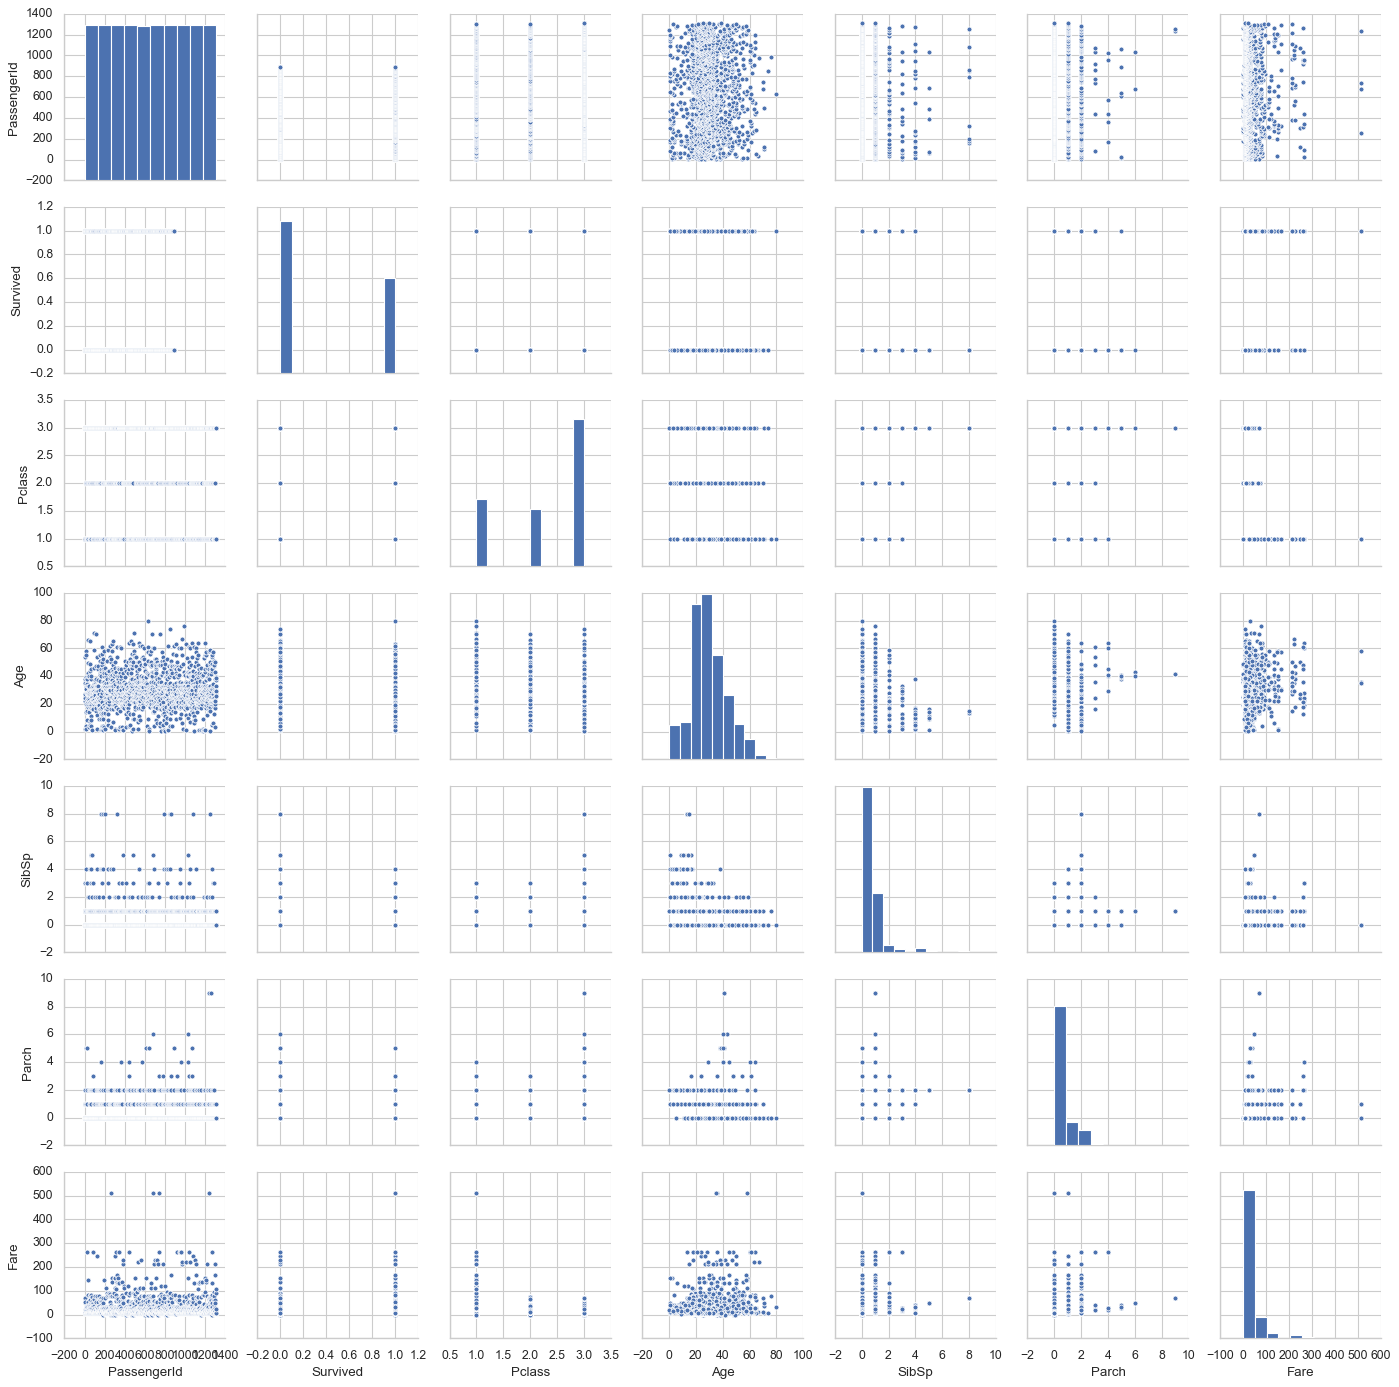

In [21]:
# Set figure size
# Correlation matrix
# Add title
# Show plot
sns.pairplot(data)
plt.show()

#### What are the most correlated features? Comment.

~~~~~
I do not see any correlated features, either positively or negatively correlated.
~~~~~

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

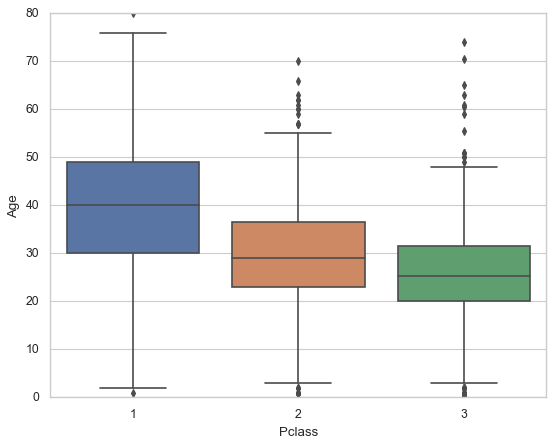

In [22]:
# Boxplot
# Show the plot
sns.boxplot(y=data['Age'],x=data["Pclass"])
plt.show()

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

In [23]:
# Create a grid with FacetGrid
# Draw a plot on each facet
# Show the plot

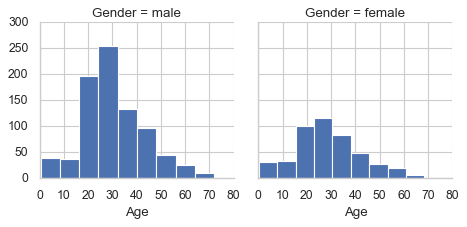

In [24]:
distribution = sns.FacetGrid(data, col="Gender")
distribution.map(plt.hist, 'Age')
plt.show()